In [1]:
%matplotlib inline
from pylab import *

In [2]:
from classy import *

Version  1.0.7
Version:  0.0.50


In [3]:
ls "images/training squares"

blank/   player1/ player2/


## Do these numbers make sense?

In [4]:
images=image.load_images('images/training squares/')
images=remap_targets(images,new_target_names=['blank','player1','player2'])
summary(images)

[player1]: 58 files found
[blank]: 46 files found
[player2]: 56 files found
Images
160 images of shape (50, 50, 3)
Target values given.
Target names: 'blank', 'player1', 'player2'
[blank]: 46 files
[player1]: 58 files
[player2]: 56 files


In [5]:
images['data'][0].shape

(50, 50, 3)

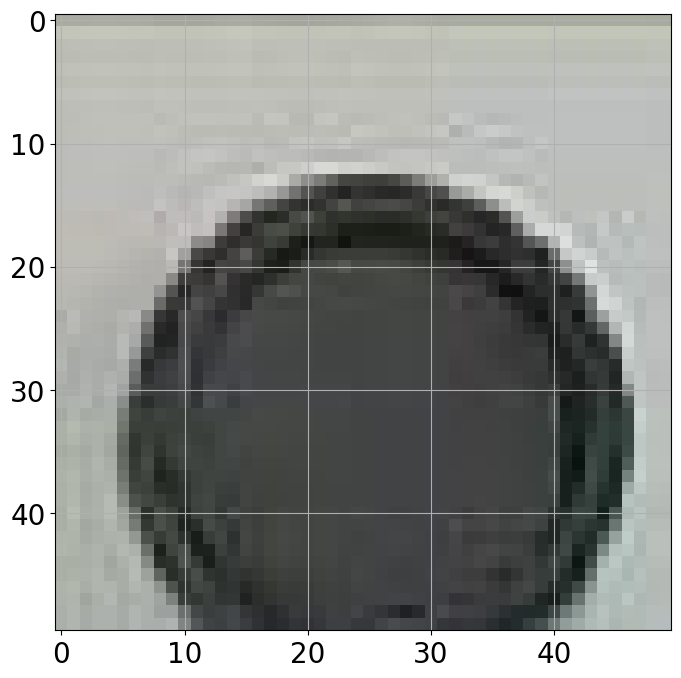

In [6]:
imshow(images['data'][0])

## Do these numbers make sense?

In [7]:
data=image.images_to_vectors(images)

160 vectors of length 7500
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p7495', 'p7496', 'p7497', 'p7498', 'p7499'  (7500 features)
Target values given.
Target names: 'blank', 'player1', 'player2'
Mean:  [137.425   144.825   138.8125  ... 182.66875 186.55    177.6125 ]
Median:  [153.5 162.  156.  ... 184.  188.  180. ]
Stddev:  [49.93940703 52.7113069  53.27830087 ... 12.93334927 17.7122133
 17.01285819]


# Classification

In [8]:
data_train,data_test=split(data,test_size=0.2)

Original vector shape:  (160, 7500)
Train vector shape:  (128, 7500)
Test vector shape:  (32, 7500)


In [9]:
C=NaiveBayes()
C.fit(data_train.vectors,data_train.targets)
print("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Training Set: 100.0
On Test Set: 100.0


In [10]:
C.means

array([[129.28947368, 135.44736842, 127.65789474, ..., 182.5       ,
        188.23684211, 176.15789474],
       [141.91666667, 144.89583333, 140.54166667, ..., 187.97916667,
        189.8125    , 182.39583333],
       [141.4047619 , 153.78571429, 147.92857143, ..., 181.5       ,
        187.02380952, 178.95238095]])

## does this shape make sense?

In [13]:
C.means.shape

(3, 7500)

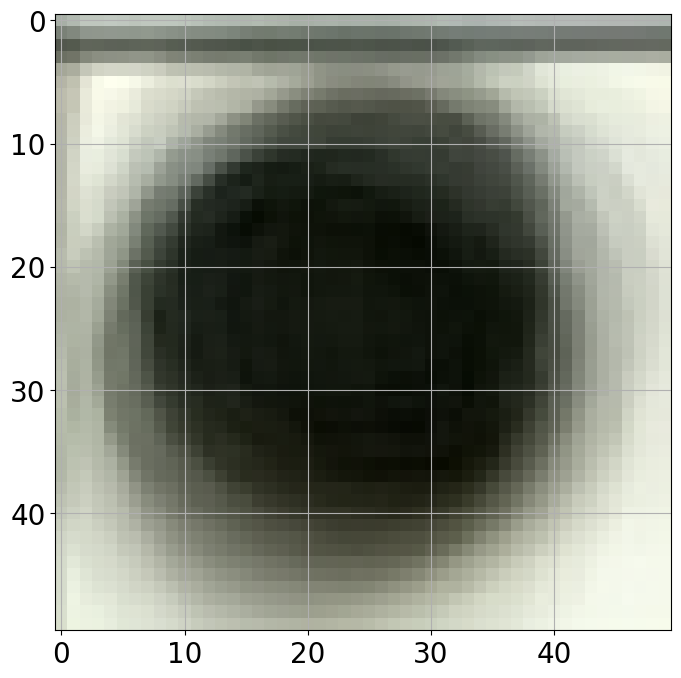

In [15]:
one_mean=C.means[1,:]
im0=one_mean.reshape((50,50,3))
im0=im0-im0.min()  # set the min to zero
im0=im0/im0.max()  # set the max to 1
imshow(im0)

- visualize the other ones

Some classifiers have more than 1 prototype per category.  for CSC and RCE they are called `C.centers`.

In [16]:
C=CSC()
C.fit(data_train.vectors,data_train.targets)
print("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Training Set: 100.0
On Test Set: 96.875


In [17]:
C.centers.shape

(14, 7500)

- visualize these

## can you visualize kNearestNeighbor this way?

# Some more classification examples

- try the digits folder
- make a new folder with a handful of the categories from the hawkins_bitmaps